<a href="https://colab.research.google.com/github/gddeazevedo/kmeans_with_graphs/blob/main/kmeans_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm, colors
from collections import defaultdict


class FileGraph(nx.Graph):
    def __init__(self, file_name, incoming_graph_data=None, **attr):
        super().__init__(incoming_graph_data, **attr)
        self.file = open(file_name)
        self.file_name = file_name
        self.edges_list = []
        self.nodes_coordinates, self.k = self.__get_graph_and_get_k(file_name)

    def __get_graph_and_get_k(self, file_name: str):
        '''
        Returns an list of tuples containing the x and y of each node
        and returns the numbers k of clusters
        and adds all the edges
        '''
        coordinates = []
        i = 0
        nodes, edges, k = 0, 0, 0
        lines = self.file.readlines()

        for index, line in enumerate(lines):
            if index == 0:
                nodes, edges, k = list(map(int, line.split('\t')[:3]))
            elif index == 1:
                continue
            elif i < nodes:
                x, y = list(map(int, line.split('\t')[:2]))
                coordinates.append((x, y))
                self.add_node(i, coordinate=(x, y))
                i += 1
            elif line != '\n':
                u, v, w = list(map(int, line.split('\t')[:3]))
                self.add_edge(u, v, weight=w)

        return coordinates, k

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.file.close()


def draw_communities(G, labels, pos):
    fig, ax = plt.subplots(figsize=(10, 5))
    aux_dict = defaultdict(list)

    for node, cluster in enumerate(labels):
      if node != cluster:
        aux_dict[cluster].append(node)

    norm = colors.Normalize(vmin=0, vmax=len(aux_dict.keys()))

    for cluster, members in aux_dict.items():
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=members,
            node_color=cm.jet(norm(cluster)),
            node_size=500,
            alpha=0.8, ax=ax)

    plt.title(G.file_name)
    nx.draw_networkx_edges(G, pos, alpha=.5, ax=ax)


FileGraph with 512 nodes and 976 edges
Number of clusters: 10
Clusters' labels: [5 5 5 5 5 7 7 7 7 7 7 7 7 4 4 4 4 4 4 4 6 6 6 6 6 6 0 0 0 0 0 0 5 5 5 5 5
 7 7 7 7 7 7 7 7 4 4 4 4 4 4 4 6 6 6 6 6 0 0 0 0 0 0 0 5 5 5 5 5 7 7 7 7 7
 7 7 7 4 4 4 4 4 4 4 6 6 6 6 6 6 0 0 0 0 0 0 5 5 5 5 5 5 7 7 7 7 7 7 7 4 4
 4 4 4 4 4 6 6 6 6 6 6 0 0 0 0 0 0 5 5 5 5 5 5 7 7 7 7 7 7 4 4 4 4 4 4 4 4
 6 6 6 6 6 6 0 0 0 0 0 0 5 5 5 5 5 5 7 7 7 7 7 7 4 4 4 4 4 4 4 4 6 6 6 6 6
 6 0 0 0 0 0 0 5 5 5 5 5 5 7 7 7 7 7 7 4 4 4 4 4 4 4 4 6 6 6 6 6 6 0 0 0 0
 0 0 5 5 5 5 5 5 5 1 1 1 1 1 1 1 4 4 4 4 4 6 6 6 6 6 6 6 0 0 0 0 0 0 5 5 5
 5 5 3 1 1 1 1 1 1 1 1 2 2 2 2 2 8 8 8 8 8 8 8 8 9 9 9 9 9 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 8 8 8 8 8 8 9 9 9 9 9 9 3 3 3 3 3 3 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 8 8 8 8 8 8 9 9 9 9 9 9 3 3 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2
 2 2 8 8 8 8 8 8 9 9 9 9 9 9 3 3 3 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2 8 8 8
 8 8 8 9 9 9 9 9 9 3 3 3 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 8 8 8 8 8 8 9 9
 9 9 9 9 3 3 3 3 3 3

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


FileGraph with 512 nodes and 511 edges
Number of clusters: 10
Clusters' labels: [4 4 4 4 4 4 4 0 0 0 0 0 8 8 8 8 8 8 8 1 1 1 1 1 1 1 6 6 6 6 6 6 4 4 4 4 4
 4 4 0 0 0 0 0 8 8 8 8 8 8 8 1 1 1 1 1 1 1 6 6 6 6 6 6 4 4 4 4 4 4 4 0 0 0
 0 0 8 8 8 8 8 8 8 1 1 1 1 1 1 6 6 6 6 6 6 6 4 4 4 4 4 4 4 0 0 0 0 0 0 8 8
 8 8 8 8 1 1 1 1 1 1 6 6 6 6 6 6 6 4 4 4 4 4 4 0 0 0 0 0 0 0 8 8 8 8 8 8 1
 1 1 1 1 1 1 6 6 6 6 6 6 4 4 4 4 4 4 0 0 0 0 0 0 0 8 8 8 8 8 8 1 1 1 1 1 1
 6 6 6 6 6 6 6 4 4 4 4 4 4 0 0 0 0 0 0 0 8 8 8 8 8 8 1 1 1 1 1 1 6 6 6 6 6
 6 6 9 9 9 9 4 9 0 0 0 0 0 0 0 7 8 8 8 8 8 1 1 1 1 1 1 6 6 6 6 6 6 6 9 9 9
 9 9 9 3 0 3 0 0 0 7 7 7 7 7 5 5 5 5 5 5 1 2 2 2 2 2 2 2 2 9 9 9 9 9 9 3 3
 3 3 3 7 7 7 7 7 7 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 9 9 9 9 9 3 3 3 3 3 3 7 7
 7 7 7 7 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 9 9 9 9 9 3 3 3 3 3 3 7 7 7 7 7 7 5
 5 5 5 5 5 5 2 2 2 2 2 2 2 2 9 9 9 9 9 3 3 3 3 3 3 7 7 7 7 7 7 5 5 5 5 5 5
 5 2 2 2 2 2 2 2 2 9 9 9 9 9 3 3 3 3 3 3 7 7 7 7 7 7 5 5 5 5 5 5 5 2 2 2 2
 2 2 2 2 9 9 9 9 3 3

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


FileGraph with 512 nodes and 732 edges
Number of clusters: 10
Clusters' labels: [6 6 6 6 6 6 9 9 9 9 9 2 2 2 2 2 2 2 1 1 1 1 1 1 1 5 5 5 5 5 5 5 6 6 6 6 6
 6 9 9 9 9 9 2 2 2 2 2 2 2 1 1 1 1 1 1 1 5 5 5 5 5 5 5 6 6 6 6 6 6 9 9 9 9
 9 2 2 2 2 2 2 2 1 1 1 1 1 1 1 5 5 5 5 5 5 5 6 6 6 6 6 6 9 9 9 9 9 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 5 5 5 5 5 5 5 6 6 6 6 6 6 9 9 9 9 9 9 2 2 2 2 2 2 1 1
 1 1 1 1 1 5 5 5 5 5 5 5 6 6 6 6 6 6 9 9 9 9 9 9 2 2 2 2 2 2 1 1 1 1 1 1 1
 5 5 5 5 5 5 5 6 6 6 6 6 9 9 9 9 9 9 9 2 2 2 2 2 2 1 1 1 1 1 1 1 5 5 5 5 5
 5 5 6 6 6 6 6 9 9 9 9 9 9 9 2 2 2 2 8 8 8 1 1 1 1 1 3 5 5 5 5 5 5 5 4 4 4
 4 4 4 9 9 9 0 0 0 0 2 8 8 8 8 8 8 3 3 3 3 3 3 7 7 7 7 7 7 4 4 4 4 4 4 4 0
 0 0 0 0 0 0 8 8 8 8 8 8 3 3 3 3 3 3 7 7 7 7 7 7 4 4 4 4 4 4 4 0 0 0 0 0 0
 0 8 8 8 8 8 8 3 3 3 3 3 3 7 7 7 7 7 7 4 4 4 4 4 4 4 0 0 0 0 0 0 0 8 8 8 8
 8 8 3 3 3 3 3 3 7 7 7 7 7 7 4 4 4 4 4 4 4 0 0 0 0 0 0 0 8 8 8 8 8 8 3 3 3
 3 3 3 7 7 7 7 7 7 4 4 4 4 4 4 4 0 0 0 0 0 0 0 8 8 8 8 8 8 3 3 3 3 3 3 7 7
 7 7 7 7 4 4 4 4 4 4

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


FileGraph with 1024 nodes and 1984 edges
Number of clusters: 20
Clusters' labels: [16 16 16 ...  0  0  0]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


FileGraph with 1024 nodes and 1023 edges
Number of clusters: 20
Clusters' labels: [ 7  7  7 ... 18 18 18]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


FileGraph with 1024 nodes and 1488 edges
Number of clusters: 20
Clusters' labels: [ 6  6  6 ... 12 12 12]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


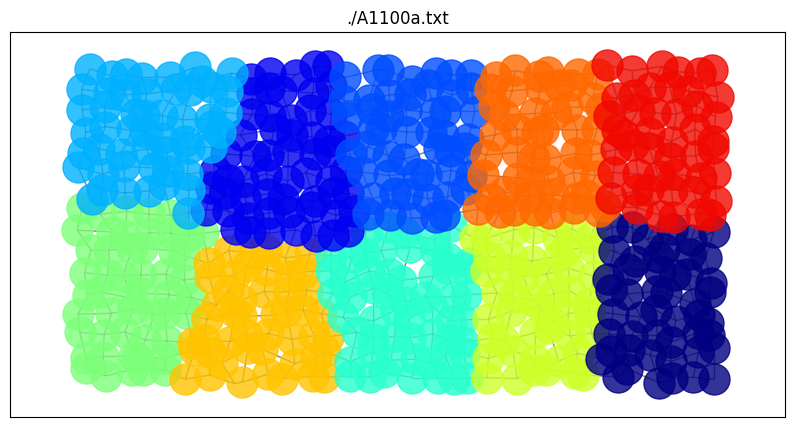

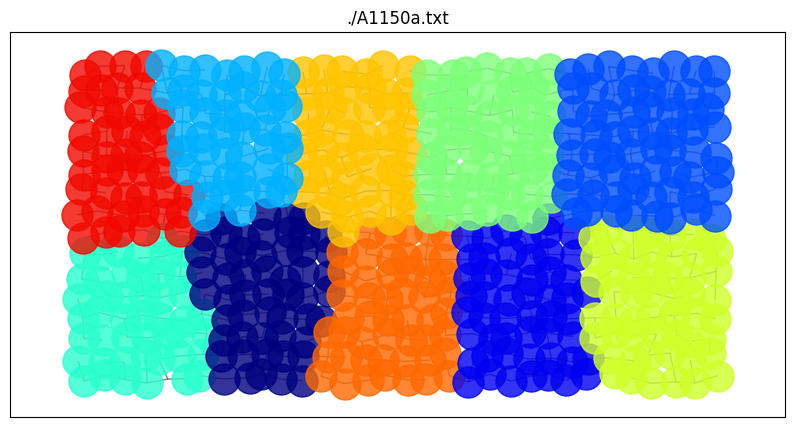

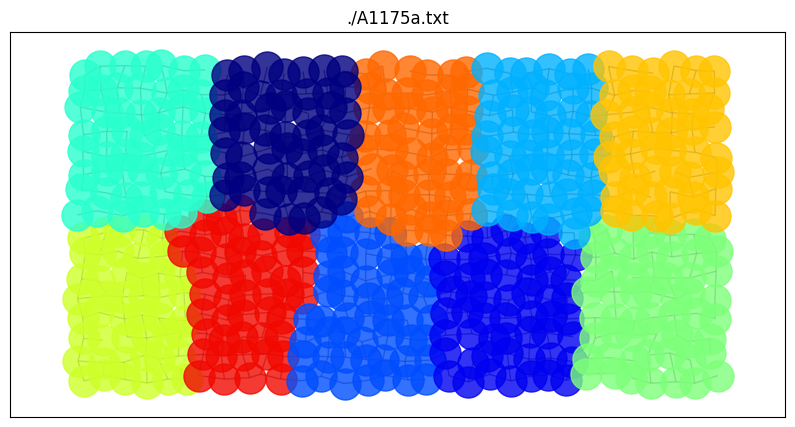

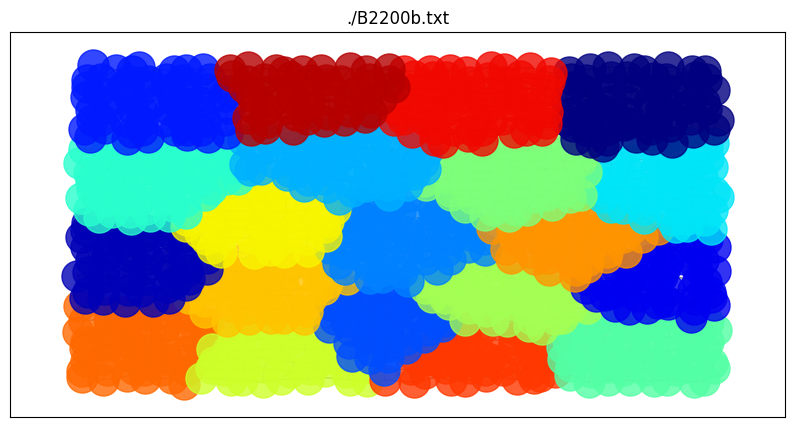

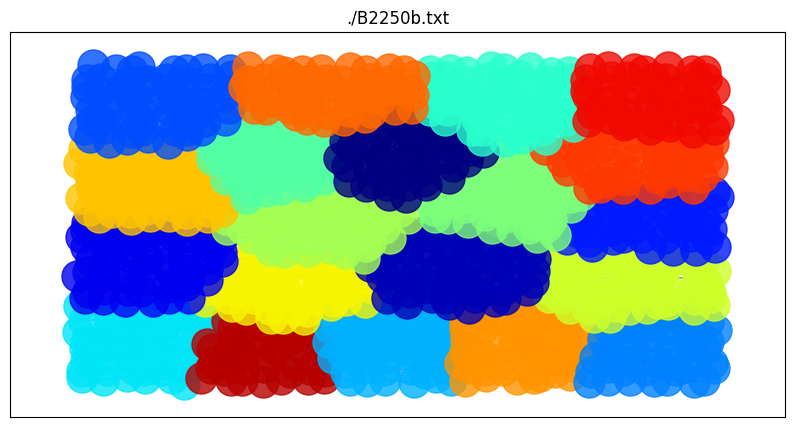

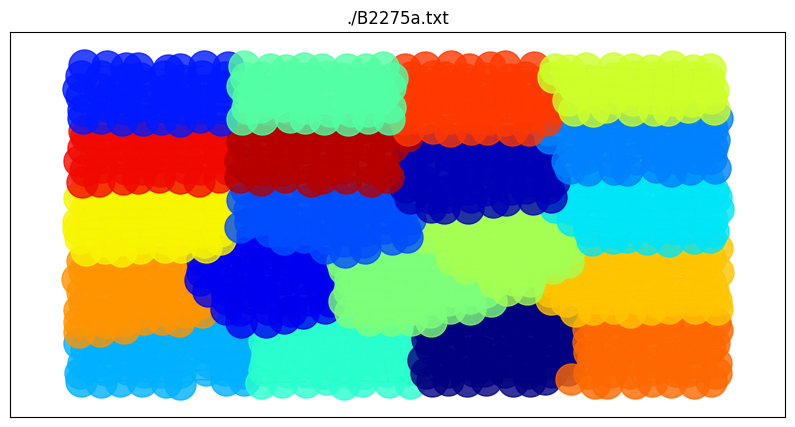

In [22]:
files = (
    './A1100a.txt', './A1150a.txt',
    './A1175a.txt', './B2200b.txt',
    './B2250b.txt', './B2275a.txt'
)


for file in files:
  with FileGraph(file) as G:
      print(G)
      print(f'Number of clusters: {G.k}')
      kmeans = KMeans(n_clusters=G.k, max_iter=300, n_init=10)
      kmeans.fit(G.nodes_coordinates)
      print(f"Clusters' labels: {kmeans.labels_}")
      pos = nx.spring_layout(G)
      draw_communities(G, kmeans.labels_, G.nodes_coordinates)